In [6]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.8/921.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [7]:
import torch
from ultralytics import YOLO

In [8]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [9]:
# change makefile to have GPU, OPENCV and LIBSO enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [12]:
# make darknet (builds darknet so that you can then use the darknet.py file and have its dependencies)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https:/

In [13]:
# get bthe scaled yolov8 weights file that is pre-trained to detect 80 classes (objects) from shared google drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq" -O yolov4-csp.weights && rm -rf /tmp/cookies.txt

--2025-02-26 11:13:10--  https://docs.google.com/uc?export=download&confirm=&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq
Resolving docs.google.com (docs.google.com)... 74.125.139.138, 74.125.139.101, 74.125.139.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.139.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq&export=download [following]
--2025-02-26 11:13:10--  https://drive.usercontent.google.com/download?id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2430 (2.4K) [text/html]
Saving to: ‘yolov4-csp.weights’

yolov4-csp.weights  100%[===================>]   2.37K  --.-KB/s    in 0s 

In [34]:
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https:/

In [43]:
import sys
sys.path.append('/content/darknet')

In [45]:
# # import darknet functions to perform object detections
# from darknet import *
# # load in our YOLOv4 architecture network
# network, class_names, class_colors = load_network("cfg/yolov4-csp.cfg", "cfg/coco.data", "yolov4-csp.weights")
# width = network_width(network)
# height = network_height(network)

# # darknet helper function to run detection on image
# def darknet_helper(img, width, height):
#   darknet_image = make_image(width, height, 3)
#   img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   img_resized = cv2.resize(img_rgb, (width, height),
#                               interpolation=cv2.INTER_LINEAR)

#   # get image ratios to convert bounding boxes to proper size
#   img_height, img_width, _ = img.shape
#   width_ratio = img_width/width
#   height_ratio = img_height/height

#   # run model on darknet style image to get detections
#   copy_image_from_bytes(darknet_image, img_resized.tobytes())
#   detections = detect_image(network, class_names, darknet_image)
#   free_image(darknet_image)
#   return detections, width_ratio, height_ratio

In [17]:
# Load YOLOv8 model (Pre-trained)
model_path = "/mnt/data/yolov8n.pt"  # Path to your uploaded YOLOv8 model
model = YOLO("/mnt/data/yolov8n.pt")  # Confirm you're using the nano model

100%|██████████| 6.25M/6.25M [00:00<00:00, 77.9MB/s]


In [18]:
import gc

✅ Image loaded successfully! Shape: (424, 640, 3)

0: 448x640 1 person, 1 dog, 1 horse, 132.9ms
Speed: 2.8ms preprocess, 132.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


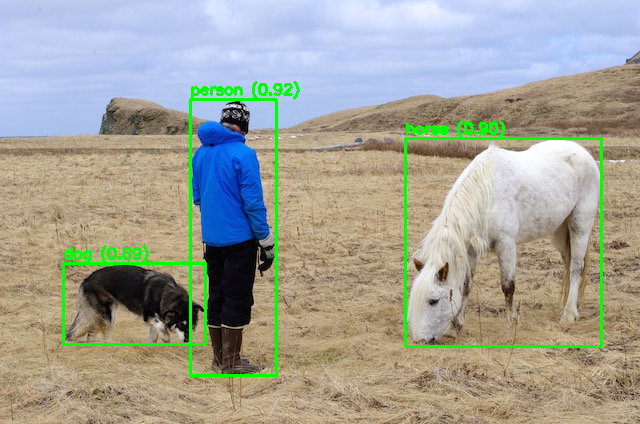

In [49]:
# Load an input image
image_path = "data/person.jpg"  # Change this path if needed
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("❌ Error: Image not found! Please check the file path.")
else:
    print(f"✅ Image loaded successfully! Shape: {image.shape}")

    # Reduce image size for efficiency (keeping aspect ratio)
    max_dim = 640  # YOLOv8 standard input size
    height, width = image.shape[:2]

    if max(height, width) > max_dim:
        scale = max_dim / max(height, width)
        new_size = (int(width * scale), int(height * scale))
        image_resized = cv2.resize(image, new_size)
    else:
        image_resized = image.copy()

    # Force model to run on CPU if memory issues occur
    model.to("cpu")  # Remove this if GPU works fine

    # Run YOLOv8 object detection
    results = model(image_resized)

    # Process detections and draw bounding boxes
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = float(box.conf[0])  # Confidence score
            cls = int(box.cls[0])  # Class ID

            label = model.names[cls]  # Get class name
            color = (0, 255, 0)  # Green color for bounding box

            # Draw bounding box
            cv2.rectangle(image_resized, (x1, y1), (x2, y2), color, 2)

            # Add label and confidence score
            cv2.putText(image_resized, f"{label} ({conf:.2f})", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the output image in Colab
    cv2_imshow(image_resized)

In [20]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [21]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    # Capture the photo
    data = eval_js(f'takePhoto({quality})')
    img = js_to_image(data)  # Convert JS image to OpenCV format

    # Resize image for YOLOv8 (keeping aspect ratio)
    max_dim = 640  # YOLOv8 input size
    height, width = img.shape[:2]

    if max(height, width) > max_dim:
        scale = max_dim / max(height, width)
        new_size = (int(width * scale), int(height * scale))
        img_resized = cv2.resize(img, new_size)
    else:
        img_resized = img.copy()

    # Run YOLOv8 object detection
    results = model(img_resized)

    # Draw detections on the image
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = float(box.conf[0])  # Confidence score
            cls = int(box.cls[0])  # Class ID

            label = model.names[cls]  # Get class name
            color = (0, 255, 0)  # Green color for bounding box

            # Draw bounding box
            cv2.rectangle(img_resized, (x1, y1), (x2, y2), color, 2)

            # Add label and confidence score
            cv2.putText(img_resized, f"{label} ({conf:.2f})", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Save the detected image
    cv2.imwrite(filename, img_resized)

    return filename


<IPython.core.display.Javascript object>


0: 480x640 1 person, 1 cell phone, 132.3ms
Speed: 4.3ms preprocess, 132.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
Saved to photo.jpg


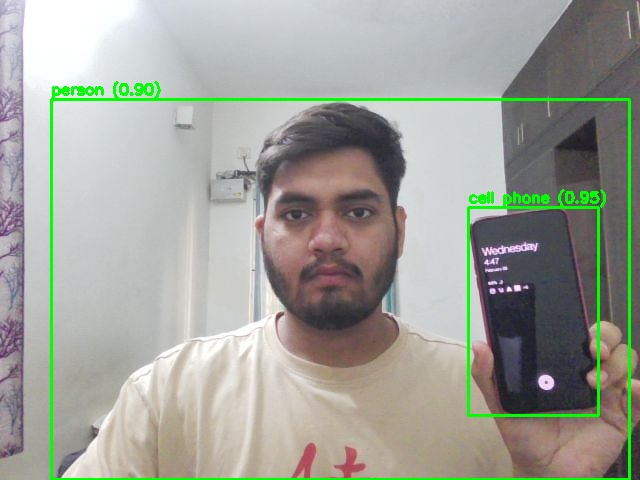

In [30]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [31]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [32]:
# Start streaming video from webcam
video_stream()

# Label for video
label_html = 'Capturing...'

# Initialize bounding box overlay
bbox = ''
count = 0

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # Convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Create transparent overlay for bounding boxes
    bbox_array = np.zeros([frame.shape[0], frame.shape[1], 4], dtype=np.uint8)

    # Run YOLOv8 object detection
    results = model(frame)

    # Loop through detections and draw them on overlay image
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = float(box.conf[0])  # Confidence score
            cls = int(box.cls[0])  # Class ID

            label = model.names[cls]  # Get class name
            color = (0, 255, 0, 255)  # Green color with alpha

            # Draw bounding box and label on transparent overlay
            bbox_array = cv2.rectangle(bbox_array, (x1, y1), (x2, y2), color, 2)
            bbox_array = cv2.putText(bbox_array, f"{label} ({conf:.2f})",
                                     (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                                     0.5, color, 2)

    # Ensure transparency channel is correctly set
    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255

    # Convert overlay to bytes
    bbox_bytes = bbox_to_bytes(bbox_array)

    # Update bbox so next frame gets new overlay
    bbox = bbox_bytes


<IPython.core.display.Javascript object>


0: 480x640 1 person, 138.5ms
Speed: 4.2ms preprocess, 138.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 144.5ms
Speed: 4.0ms preprocess, 144.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 130.6ms
Speed: 3.1ms preprocess, 130.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 131.9ms
Speed: 2.8ms preprocess, 131.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 135.8ms
Speed: 4.2ms preprocess, 135.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 153.0ms
Speed: 4.2ms preprocess, 153.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 205.1ms
Speed: 2.5ms preprocess, 205.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 213.9ms
Speed: 2.6ms preprocess, 213.9ms inference, 1.3ms postprocess per image at